(22,)


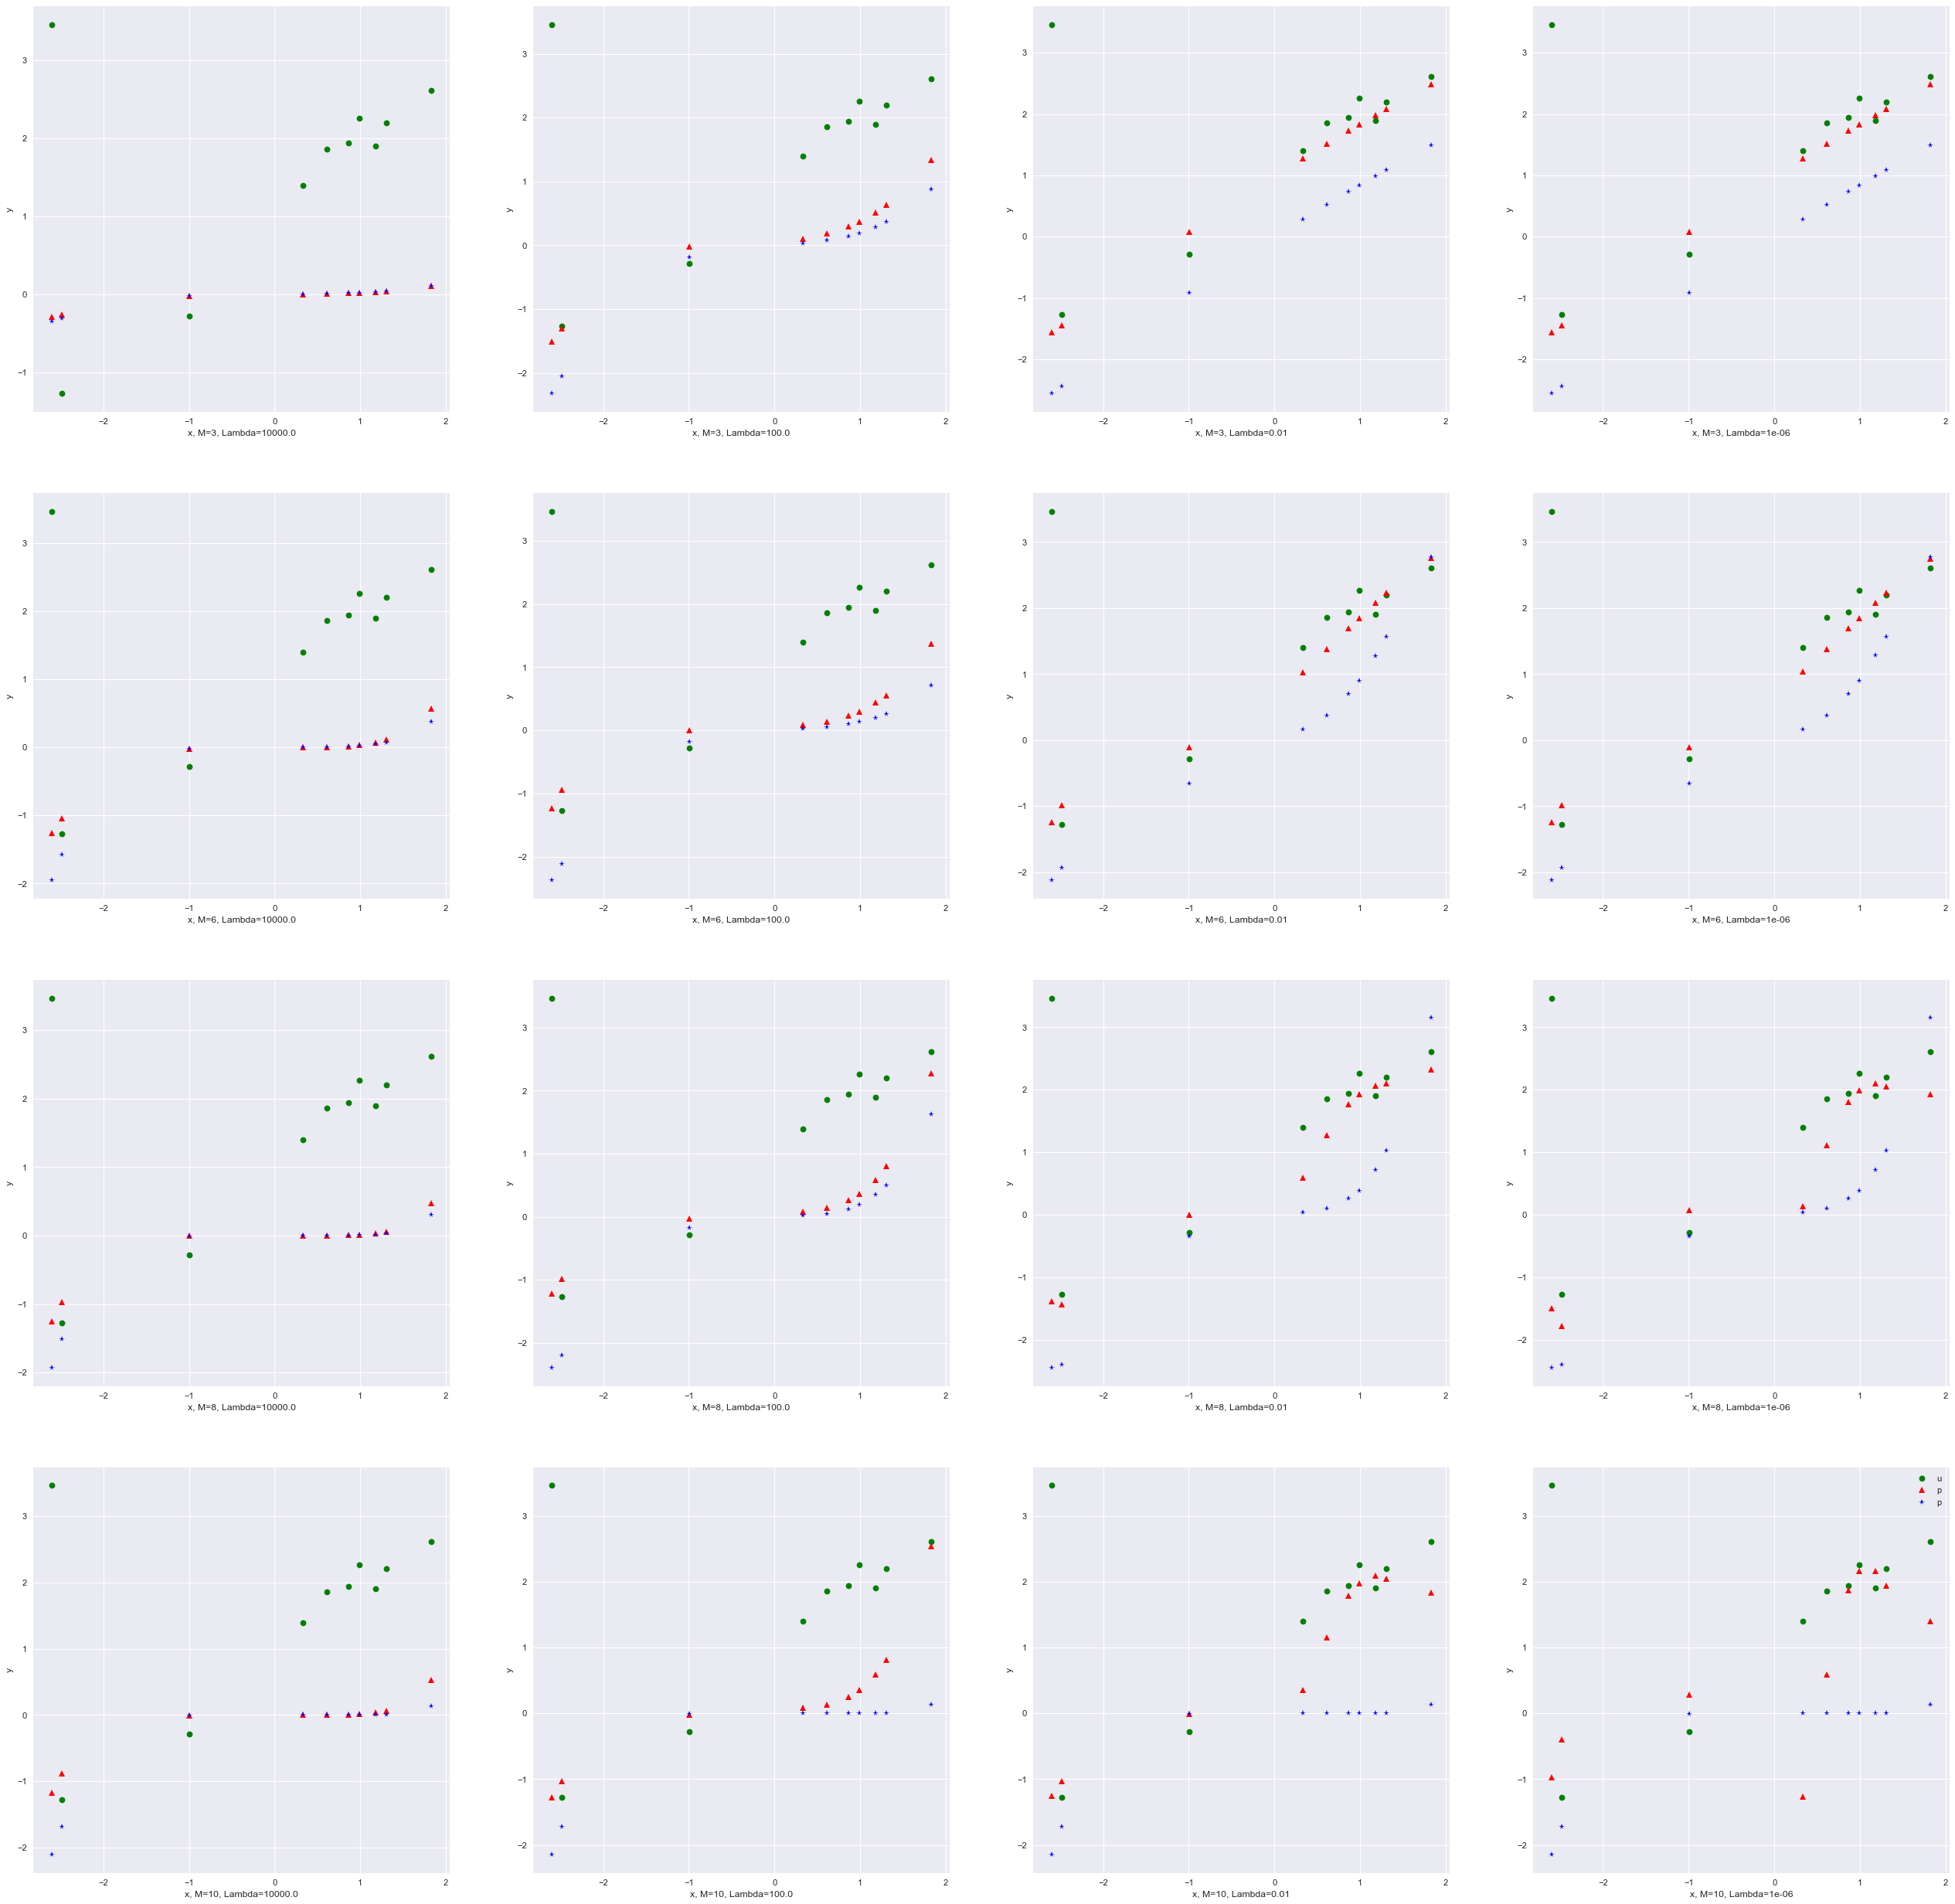

In [1]:
%matplotlib inline
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model
import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1]
    Y = data[1:2]
    return X[0], Y[0]

def regressAData():
    return getData('regressA_train.txt')

def regressBData():
    return getData('regressB_train.txt')

def validateData():
    return getData('regress_validate.txt')

X_A, Y_A = regressAData()
X_B, Y_B = regressBData()
X_val, Y_val = validateData()
print X_val.shape

def polynomial_basis(x, M):
    poly = np.arange(M+1)
    X = np.power(np.array([x]).T, poly)
    return X

# These weights are calculated using the closed form
def weights(X, Y, lambd):
    features = X.shape[1]
    theta = np.dot(np.linalg.inv(lambd*np.identity(features) + (np.dot(X.T, X))), np.dot(X.T, Y))
    return theta

def l2_weights(X, Y, lambd):
    clf = linear_model.Ridge(lambd, solver='lsqr')
    clf.fit(X,Y)
    return clf.coef_

def predict(x, Y, M, theta):
    X = polynomial_basis(x, M)
    #theta = weights(X, Y, M, lambd)
    Y_hat = np.dot(X, theta)
    return Y_hat

# To find the closenes we can plot the R^2 distance between the true Y and the predicted Y
from scipy import stats
def r2(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2


# Use Regress A as Training set and B as Test data set
# It plots the Scatter plot
M = np.array([3,6,8,10])
lambd = np.array([1e4,1e2,1e-2,1e-6])
plt.figure(1,figsize=(40, 40), dpi=80)
for i in range (M.shape[0]):
    for j in range (lambd.shape[0]):
        theta = weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
        plt.subplot(M.shape[0], lambd.shape[0], M.shape[0]*i+j+1)
        theta_l2 = l2_weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
        plt.plot(X_B,Y_B,'go', label='Y true val')
        plt.plot(X_B, predict(X_B, Y_B, M[i], theta), 'r^', label='Y predicted val')
        plt.plot(X_B, predict(X_B, Y_B, M[i], theta_l2), 'b*', label='Y predicted val')
        
        xlabel = 'x, M='+str(M[i])+ ', Lambda=' +str(lambd[j])
        plt.xlabel(xlabel)
        plt.ylabel('y')
plt.legend('upper left')
plt.show()


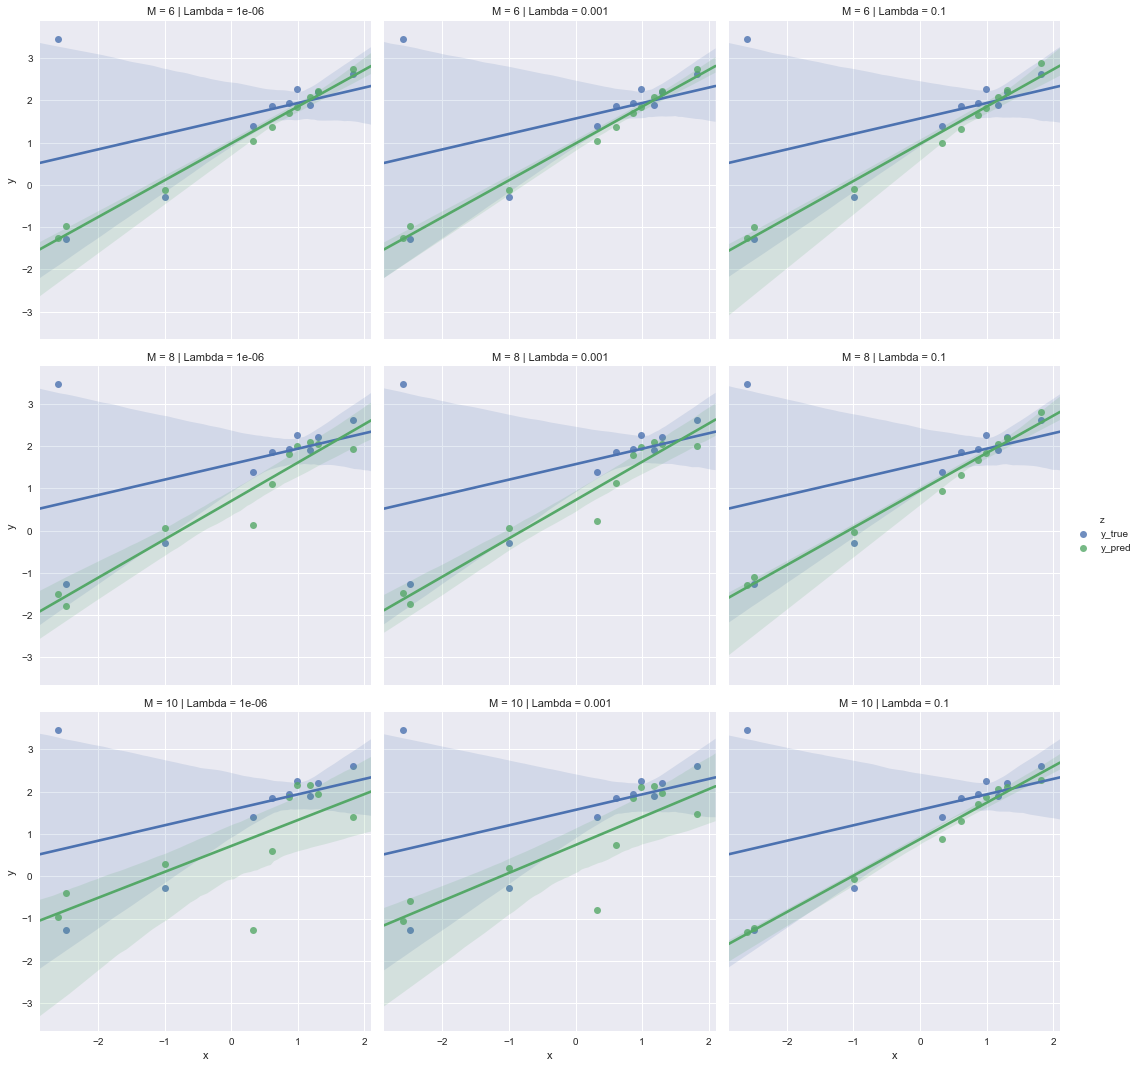

In [8]:
M = np.array([6, 8,10])
lambd = np.array([1e-1, 1e-3, 1e-6])
df = pd.DataFrame()
plt.figure(1,figsize=(16, 6), dpi=80)
for i in range (M.shape[0]):
    for j in range (lambd.shape[0]):
        theta = weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
        y_pred = predict(X_B, Y_B, M[i], theta)
        r2_text = 'r2=' + str(r2(Y_B, y_pred))
        
        df1 = pd.DataFrame()
        df1['x'] = X_B
        df1['y'] = Y_B
        df1['z'] = 'y_true'
        df1['M'] = M[i]
        df1['Lambda'] = lambd[j]
        df1['r2'] = r2_text
        
        df2 = pd.DataFrame()
        df2['x'] = X_B
        df2['y'] = y_pred
        df2['z'] = 'y_pred'
        df2['M'] = M[i]
        df2['Lambda'] = lambd[j]
        df2['r2'] = r2_text
        
        df = df.append(df1)
        df = df.append(df2)
        #ax.text(0.85, 0.85,r2_text, fontsize=9) #add text
sns_plot = sns.lmplot(x='x', y='y', hue='z', row='M', col='Lambda', data=df)
sns_plot.savefig('P3b')

In [3]:
#M = np.array([8, 10])
#lambd = np.array([1e4,1e1,1e-1])
#df = pd.DataFrame()

#for i in range (M.shape[0]):
#    for j in range (lambd.shape[0]):
#        theta = weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
#        df1 = pd.DataFrame()
#        df1['x'] = Y_B
#        df1['y'] = predict(X_B, Y_B, M[i], theta)
#        df1['M'] = M[i]
#        df1['Lambda'] = lambd[j]
#        df = df.append(df1)
#        sns_plot = sns.jointplot(x='x', y='y', kind="reg", stat_func=r2, data=df1)
#        title = "M =" + str(M[i]) + " Lambda ="+str(lambd[j])
#        sns.plt.suptitle(title)


#sns_plot = sns.lmplot(x='x', y='y', hue='z', row='M', col='Lambda', data=df)
#sns_plot.savefig('P3b_snsplot_pred')

1e-06
1.26638017347e-06
1.60371874375e-06
2.0309176209e-06
2.57191380906e-06
3.25702065566e-06
4.1246263829e-06
5.22334507427e-06
6.61474064123e-06
8.37677640068e-06
1.06081835514e-05
1.3433993326e-05
1.70125427985e-05
2.15443469003e-05
2.72833337649e-05
3.45510729459e-05
4.37547937507e-05
5.54102033001e-05
7.0170382867e-05
8.88623816274e-05
0.00011253355826
0.00014251026703
0.000180472176683
0.000228546386413
0.000289426612472
0.000366524123708
0.000464158883361
0.000587801607227
0.000744380301325
0.000942668455118
0.00119377664171
0.00151177507062
0.00191448197617
0.00242446201708
0.00307029062976
0.00388815518031
0.00492388263171
0.00623550734127
0.0078965228685
0.01
0.1
0.119377664171
0.14251026703
0.170125427985
0.20309176209
0.242446201708
0.289426612472
0.345510729459
0.41246263829
0.492388263171
0.587801607227
0.70170382867
0.837677640068
1.0
1.19377664171
1.4251026703
1.70125427985
2.0309176209
2.42446201708
2.89426612472
3.45510729459
4.1246263829
4.92388263171
5.87801607227


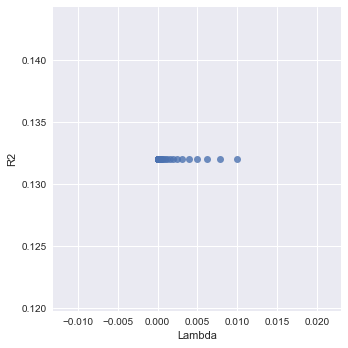

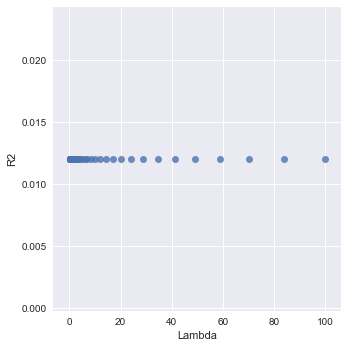

In [16]:
def getLambd(start, end, N):
    lambd = np.linspace(start, end, N)
    lambd = [10**i for i in lambd]
    lambd = [float(i) for i in lambd]
    return lambd
lambds = []
lambds.append(getLambd(-6.0, -2.0, 40)) # 3
lambds.append(getLambd(-1.0, 2.0, 40)) # 8
lambds.append(getLambd(-1.0, 4.0, 40)) # 10
#lambds.append(getLambd(-4.0, 0.0, 400)) # 10

M = np.array([8, 10])

df_list = []
for i in range (M.shape[0]):
    lambd = lambds[i]
    for j in range(len(lambd)):
        theta = l2_weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
        print lambd[j]
        df_1 = {}
        df_1['M'] = M[i]
        df_1['Lambda'] = lambd[j]

        Y_pred = predict(X_B, Y_B, M[i], theta)
       
        rsq = r2(Y_B, Y_pred)
        df_1['R2'] = rsq
        #print rsq
        df_list.append(df_1)

df = pd.DataFrame(df_list)
print df.head()
for i in M:
    #sns_plot = sns.lmplot(x='Lambda', y='R2', col='M', data=df,fit_reg=False)
    sns_plot = sns.lmplot(x='Lambda', y='R2', data=df[df['M']==i],fit_reg=False)

sns_plot.savefig('R2_plot')

In [5]:
print np.empty()

TypeError: Required argument 'shape' (pos 1) not found